In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# load data from csv into dataframe

df = pd.read_csv('Data/kc_house_data.csv')

In [3]:
# inspect first five rows

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [13]:
# how many rows total?

len(df)

21597

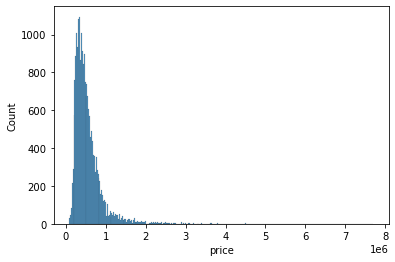

In [14]:
# view distribution of price

sns.histplot(df['price']);

In [15]:
# remove outliers prior to linear regression

df = df.loc[ df['price'] < 1000000, :].copy()

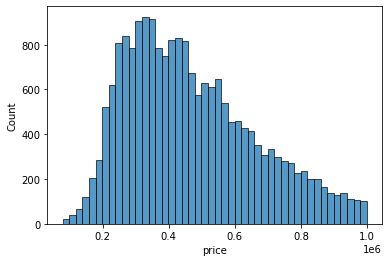

In [16]:
# view distribution of price with outliers removed

sns.histplot(df['price']);

In [17]:
# inspect first five rows

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [18]:
# how many rows now?

len(df)

20107

In [19]:
# are there any null values in predictor?

df['sqft_living'].isna().sum()

0

In [21]:
# check that predictor is float

df['sqft_living'].describe()

count    20107.00000
mean      1954.36082
std        754.83748
min        370.00000
25%       1390.00000
50%       1840.00000
75%       2410.00000
max       7480.00000
Name: sqft_living, dtype: float64

In [6]:
# import library for train test split

from sklearn.model_selection import train_test_split

In [25]:
# 70% / 30% train test split

X_train, X_test, y_train, y_test = train_test_split(
    df[['sqft_living']], df[['price']], test_size=0.3, random_state=421)

In [26]:
# inspect X_train first five rows

X_train.head()

,sqft_living
6163,1510
10590,2010
411,833
14502,1710
11376,2320


In [27]:
# how many rows?

len(X_train)

14074

In [28]:
# check X_train shape

X_train.shape

(14074, 1)

In [33]:
# import Linear Regression function from scikit learn linear model module

from sklearn.linear_model import LinearRegression

In [34]:
# instantiate the model

lr = LinearRegression()

In [31]:
# import cross validation function from sci kit learn module model selection

from sklearn.model_selection import cross_validate

In [36]:
# check cross validation scores for baseline model

cross_validate(lr, X_train, y_train)['test_score']

array([0.35474716, 0.35389142, 0.36682699, 0.35017069, 0.37127386])

The baseline model describes about 35% of the variance in price.

In [38]:
# now fit linear regression model to training data, to compute residuals

lr.fit(X_train, y_train)

LinearRegression()

In [52]:
# check coefficients

print(f'Slope: {lr.coef_[0][0]}')

print(f'y-intercept: {lr.intercept_[0]}')

Slope: 155.14785228755943
y-intercept: 162818.12906414107


In [40]:
# compute residuals for training data

prediction = lr.predict(X_train)

residuals = (y_train - prediction)

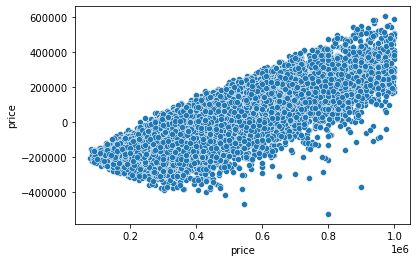

In [45]:
# plot residuals versus price

sns.scatterplot(x = y_train['price'], y = residuals['price']);

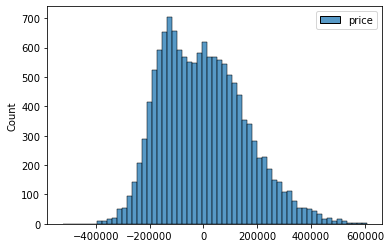

In [55]:
# check distribution of residuals visually

sns.histplot(residuals);

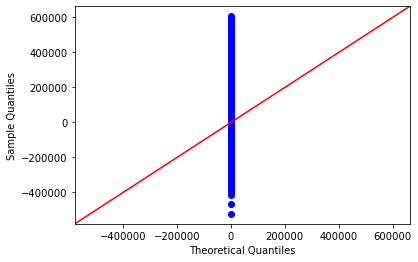

In [65]:
# import statsmodels to generate qq plot for residuals

import statsmodels.api as sm

# inspect residuals vs. normal qqplot

sm.qqplot(residuals, line='45');

In [59]:
# do I need to scale residuals? It looks like the theoretical quantiles are clustered around 0, as if for a N(0, 1)

# print mean residual

np.mean(residuals)

price    3.176317e-12
dtype: float64

In [61]:
# print standard deviation of residuals

np.std(residuals)

price    155971.663406
dtype: float64

In [62]:
# try scaling residuals

scaled_residuals = (residuals - np.mean(residuals))/np.std(residuals)

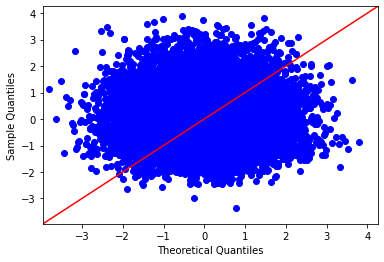

In [64]:
# reprint qq plot

sm.qqplot(scaled_residuals, line='45');

The scaled residuals don't appear to be normal either. I'm not sure how to interpret a qq plot of this shape or with the residuals scaled.